# Linear Regression to estimate high-order epistasis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from epistasis.models import EpistasisNonlinearRegression

# Define the nonlinear relationship and it's inverse.
def diminishing_returns(x, A):
    return 1.0 / (1 + A * np.exp(-x))  

def reverse_func(y, A):
    return -np.log(((1 / y) - 1)/A)

# Initialize the model
model = EpistasisNonlinearRegression.read_json("../data/nonlinear-epistasis-dataset.json",
    order=2,
    function=diminishing_returns,
    reverse=reverse_func,
    model_type="local",
)

# Fit the model.
model.fit(A=1)

/Users/Zsailer/Documents/Research/projects/pkgs/epistasis/epistasis/models/mixed.py:23: FutureWarning: 

Warning!
--------

The EpistasisMixedRegression is *very* experimental and under 
active development! Beware when using -- the API is likely to 
change rapidly.


  FutureWarning)


EpistasisNonlinearRegression(function=<function diminishing_returns at 0x10c9678c8>,
               model_type='local', order=2,
               reverse=<function reverse_func at 0x10c967a60>)

In [2]:
model.gpm.stdeviations

0     0.1
1     0.1
2     0.1
3     0.1
4     0.1
5     0.1
6     0.1
7     0.1
8     0.1
9     0.1
10    0.1
11    0.1
12    0.1
13    0.1
14    0.1
15    0.1
dtype: float64

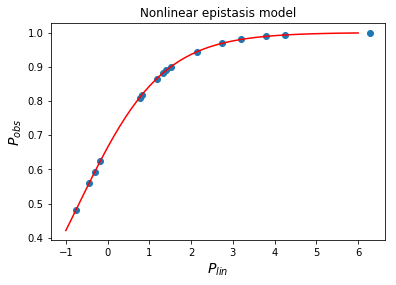

In [3]:
padd = model.Linear.predict(X="obs")
pobs = model.gpm.phenotypes
plt.plot(padd, pobs, "o")

xmodel = np.linspace(-1, 6)
ymodel = model.function(xmodel, model.parameters.A)

plt.plot(xmodel, ymodel, "-r")
plt.xlabel("$P_{lin}$", fontsize=14)
plt.ylabel("$P_{obs}$", fontsize=14)
plt.title("Nonlinear epistasis model")
plt.show()

In [4]:
from epistasis.plot import corr_resid_rhist, coefs

(<matplotlib.figure.Figure at 0x11313a860>,
  <matplotlib.axes._subplots.AxesSubplot at 0x113305780>])

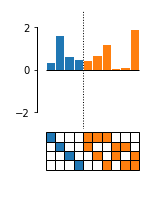

In [5]:
coefs(model.Linear.epistasis.values, model.Linear.epistasis.sites, figsize=(2,3))